### **Pre-Processing & EDA**

##### **Imports**

In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import re
import os

from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

sns.set_theme(palette='crest')

##### **Read in cleaned and saved comments dataframe**

In [278]:
df = pd.read_csv('comments.csv')
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,author,body,score,created_utc,subreddit,body_word_count
0,RobusEtCeleritas,None of that means anything You clearly have some severe misunderstandings,3,1627142891,1,11
1,hydroxypcp,The legal limit varies among countries It s common to assume that everyone on the internet is from the US but it s not always the case and then that comparison becomes meaningless For example here the legal limit is about times lower A more meaningful comparison would be to describe a level of intoxication that a non dependent person would experience at some level For example heavy slurring trouble walking unable to concentrate etc most likely loss of consciousness unable to stand up walk That gives a much better baseline to compare to than legal limit because what s a legal limit anyway You can be over the legal limit after or glasses of wine in some places and in some places it takes much more than that,0,1627140964,1,130
2,AnthillOmbudsman,But magma chambers aren t hollow caverns I m having trouble picturing how this would happen,1,1627140360,1,14
3,AWormDude,According to this study https www researchgate net profile Nissanka De Silva publication Blood Feeding Preference of Female Aedes aegypti Mosquitoes for Human Blood Group Types and Its Impact on Their Fecundity Implications for Vector Control links d b c c b Blood Feeding Preference of Female Aedes aegypti Mosquitoes for Human Blood Group Types and Its Impact on Their Fecundity Implications for Vector Control pdf aedes aegypti prefer type o blood but it has no effect on how many eggs they lay note females are the only ones to drink blood and that is because they need it for reproduction This mosquito type is responsible for the spread of diseases like zika and dengue fever amongst others but not malaria amp x B This study https www sciencedirect com science article abs pii S X on the other hand suggests that Anopheles stephensi favours type AB and according to that study those with that blood type also suffer more severely from malarial infections Anopheles type mosquitoes are those responsible for the transmission of malaria amp x B This is really interesting because it is thought that malaria infected mosquitoes have their behaviour adjusted making people more attractive https royalsocietypublishing org doi full rspb to mosquitoes that have late stage malarial infections amp x B Humans infected by malaria may be more attractive to mosquitoes https journals plos org plosbiology article id journal pbio too Now since AB positive people are more susceptible to malaria they will have a higher malarial infection making transmission of malaria more likely if mosquitoes prefer targeting AB blood type individuals It really does suggest some interesting things relating to malaria affecting both human and mosquito hosts behaviour and attractiveness amp x B Covering some of your other points the things living on your skin can have an effect https journals plos org plosone article id journal pone amp utm source yxnews amp utm medium desktop amp utm referrer https A F Fyandex kz Fnews as well as differences in compounds released by people in the scent https onlinelibrary wiley com doi abs j x affect peoples attractiveness to mosquitoes But in reality it s so incredibly complicated and we re still doing massive amounts of research into it I know a fair bit but it s not really my field so I can t go into as much detail as a true expert And I m also only covering general details here I found this interesting though a study suggests beer makes people more attractive to mosquitoes too https journals plos org plosone article id journal pone amp x B As to how they differentiate between body odours blood type etc if you read over some of the studies you can see ways they study it But a solid way they measure attractiveness to mosquitoes is to have a y shaped tube with a wind blowing mosquitoes away the top of the y has a person place their arm inside each so people The mosquitoes have to fly upwind to reach th

In [279]:
# display all contents in columns
pd.set_option("display.max_colwidth", -1)
# top 5 scores with lowest scores
df.sort_values(by=['score']).head()

<ipython-input-279-f03a946ff6ca>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


,author,body,score,created_utc,subreddit,body_word_count
17637,Ftdffdfdrdd,milions of people are dying from preventable diseases each year why would you think advanced life extention terapies would be available to all it will be only for the billionaires hey good for them,-54,1620138999,0,34
28661,manifest-decoy,if this bitch cares so much about aging why is he so old doddering old man croaking at me pls solve aging now young man maybe after u ded lol,-43,1605630849,0,30
5276,amitym,Yes if you stopped wearing masks in the first place you should resume Those of us who never stopped don t stop now We will be through this soon Very soon But right now is not the time to throw all precautions to the wind If enough people maintain pandemic measures or return to them whyyyyy did you stop it might only be a few more months Or we could keep having these conversations into Your all s choice,-36,1625777327,1,79
12221,Delphixoz,Great so we can all live long enough to watch the earth implode in years,-35,1624865151,0,16
11736,marathon,you think resource depletion and global warming is bad now wait until people live longer than they should and the population skyrockets,-32,1625232606,0,23


In [280]:
# top 5 scores with highest
df.sort_values(by=['score']).tail()

,author,body,score,created_utc,subreddit,body_word_count
6625,CreeperlordGaming,The air would get thin enough that the rotor couldn t produce a greater force of lift than the weight of the helicopter at full engine power Either that or the engines would get starved of air again because it s too thin and they wouldn t be able to produce enough thrust to counteract gravity These two effects complement each other and they determine the service ceiling,5732,1625490179,1,65
8649,srygene,I m a doctor and have done lots of reading in this area so can shed some light amp x B There is a neuroplasticity hypothesis of depression whereby as a response to stress our brains change at the cellular level in a dysfunctional way This has been demonstrated by studies in mice brain imaging and postmortems of depressed patients Namely these changes are amp x B Reduced synapse connection formation between neurons Loss of connections between existing neurons Reduced formation of new neurons Atrophy of existing neurons In the prefrontal cortex and hippocampus The prefrontal cortex is the part of the brain responsible for higher brain functions such as decision making planning concentration and personality development The hippocampus is key in learning and memory and has connections to the ventral tegmental area which is important in motivation and reward processes In the amygdala which is responsible for the fight or flight response research has shown that there is actually an increase in synapse formation between neurons which may explain why anxiety is co morbid with depression amp x B There has been research to show that anti depressants can reverse the changes seen in the prefrontal cortex and hippocampus The time it takes for anti depressants to work is in parallel to the time course for the maladaptive neuroplastic changes to be reversed amp x B TLDR Yes there are bad changes associated with a depressed persons brain yes antidepressants have been linked with a reversal to some of them,5814,1624940695,1,243
6745,DeadFyre,They do exist for example your funny bone technically the Ulnar nerve https en wikipedia org wiki Ulnar nerve is a big chunk of nerve tissue unprotected by significant amounts of muscle or bone and when struck can produce a electric shock like or numbing sensation which I m sure you ve experienced If not don t rush out and try it it s unpleasant That said the ability of someone to exploit these pressure point in a fight is highly overblown When you re in a fight your body is flooded with adrenaline and endorphins which override pain signals which would otherwise cause you to react differently so that you can continue to fight or run as the case may be,7490,1625416208,1,108
714,machina99,here s a good breakdown https www healthline com health hysterical strength how it happens Basically the adrenaline gives your more blood and oxygen to your muscles which in turn allows you to be more effective Like others have said you don t suddenly gain super strength but you are suddenly able to use the full potential of your musculature Your body normally prevents you from doing so because it isn t necessary I don t need full strength to lift my coffee cup and you could injure yourself very easily Someone once explained it to me in comparison to gorillas They re foolishly strong but lack the finer motor skills of humans because huge explosive strength is hard to direct into fine movement,8373,1626874806,1,109
8406,Astrokiwi,The most intrinsic problem is that Newton s second law F ma is actually only a low speed approximation If you are thrusting in the direction of your motion the force is actually F v c ma When v is much less than c that first term is basically and you get F ma But as v gets closer to c the first term gets bigger and bigger and starts to asymptote towards infinity This means that the faster you go the more force you need to get the same amount of acceleration And the force you need ends up increasing so rapidly as you appro

##### **Set X and y variables**

###### Remove stop words and my list of stop words created after evaluation

In [281]:
all_stop_words = stopwords.words('english')
new_words=('https', 'com', 'www', 'really', 'would', 'gt', 'like', 'also', 'get', 'even', 'much', 'could', 'see', 'really', 'know')
for i in new_words:
    all_stop_words.append(i)

In [282]:
X = df['body']
y = df['subreddit']

X = [word.lower().split() for word in df['body']]
posts_list = []
for post in X:
    meaningful_words = [word for word in post if word not in all_stop_words]
    meaningful_post = " ".join(meaningful_words)
    posts_list.append(meaningful_post)
    
modeltext = pd.Series(posts_list)
df['body'] = modeltext
X = df['body']
y = df['subreddit']
X_train, X_test, y_train, y_test = train_test_split(X,
                                   y,
                                   train_size=0.75,
                                   stratify=y,
                                   random_state=42)

In [283]:
# Instantiate CountVectorizer
cvec = CountVectorizer(stop_words = all_stop_words, max_features=500)

# Fit and transform CountVectorizer; this is just for visualization of most frequently used words
comments_transformed=(cvec.fit_transform(df['body']))

# get feature names and set as variable
feature_names = cvec.get_feature_names()

# set list of feature names as dataframe and condense vectorized data
comments_transformed=pd.DataFrame(comments_transformed.todense())

# set columns as feature names
comments_transformed.columns = feature_names

In [284]:
# set as dataframe
top_20 = pd.DataFrame(comments_transformed.sum().sort_values(ascending = False).head(20))

##### Create visualization for top 20 most frequently occurring words in Askscience & Longevity comments combined Dataframe

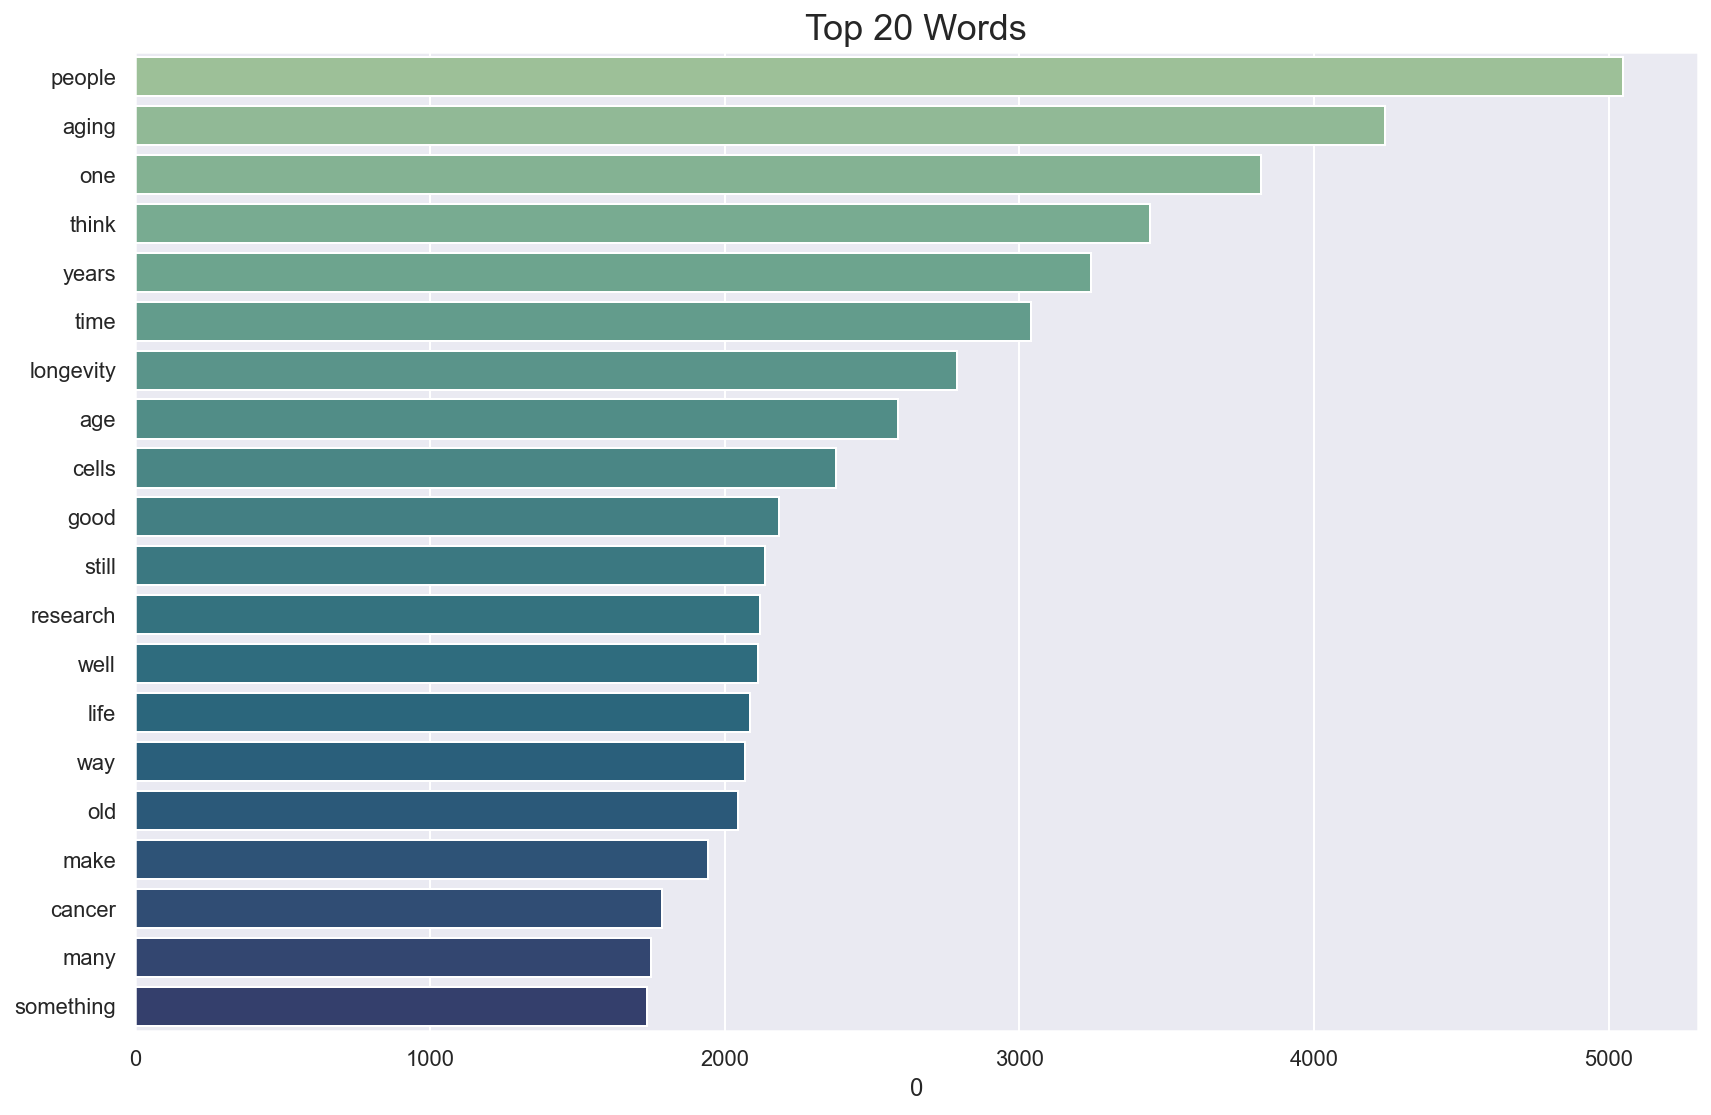

In [285]:
plt.figure(figsize=(14,9))
plt.title('Top 20 Words',fontsize=18)
sns.barplot(x=top_20[0], y=top_20.index, palette='crest')
sns.color_palette("crest", as_cmap=True);
plt.savefig('top_20_words_combined.png')

##### Some More Visualizations

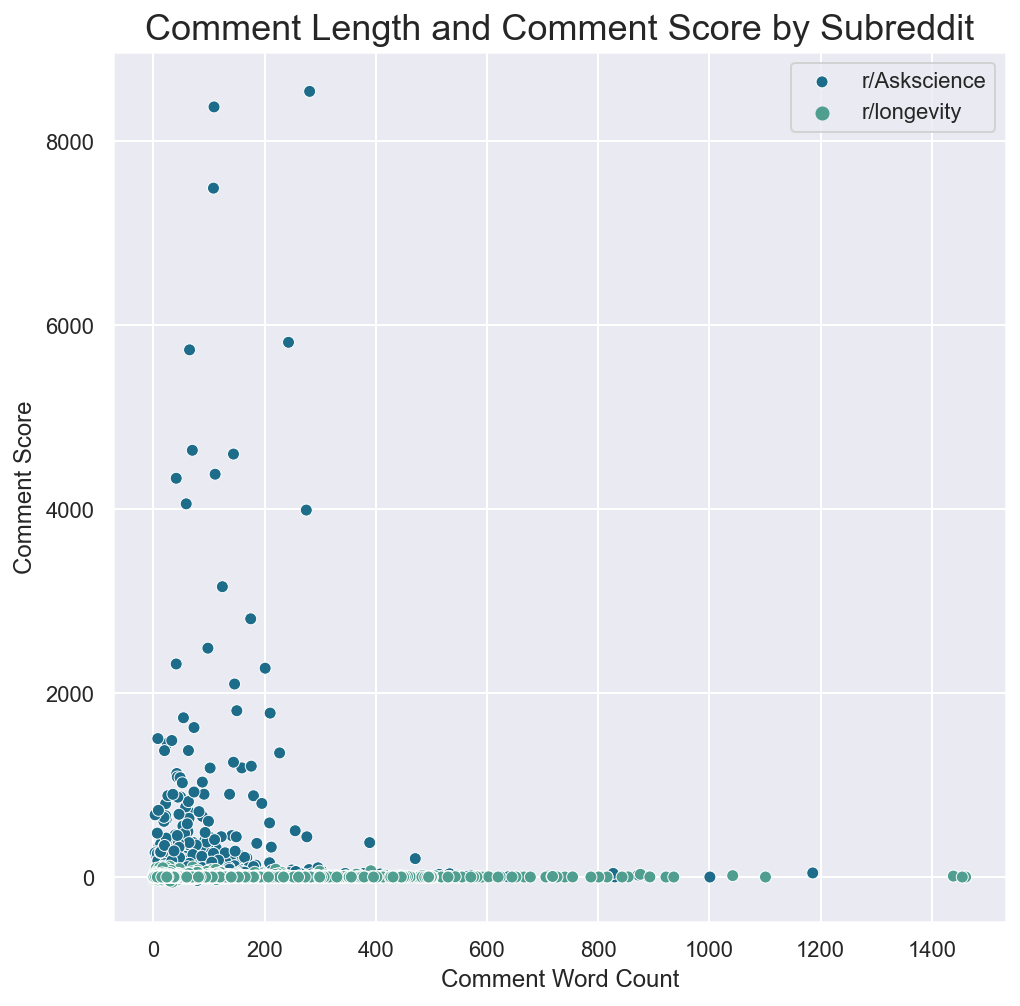

In [286]:
plt.figure(figsize=(8,8))
plt.title('Comment Length and Comment Score by Subreddit',fontsize=18)
scatterplot = sns.scatterplot(data=df, x="body_word_count", y="score", hue="subreddit",palette='crest')
scatterplot.set(xlabel='Comment Word Count')
scatterplot.set(ylabel='Comment Score')
plt.legend(labels=["r/Askscience", "r/longevity"])
plt.savefig('comment_length_score_subreddit');

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


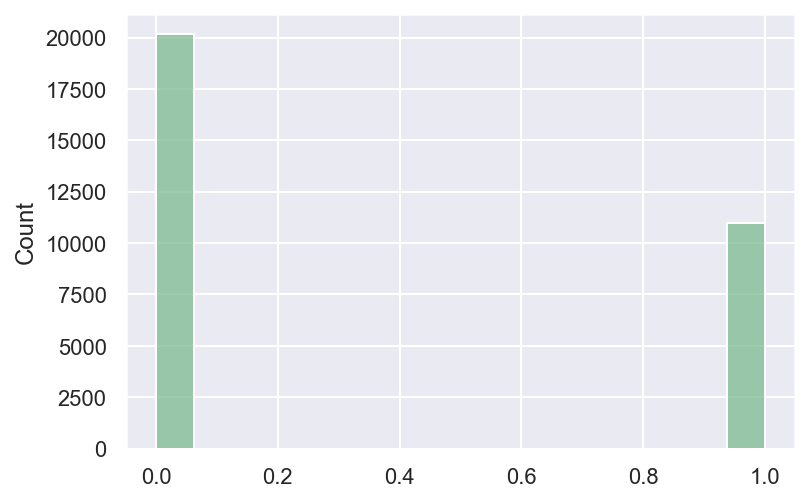

In [287]:
sns.histplot((df['subreddit'] == 0) & (df['body_word_count']));

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


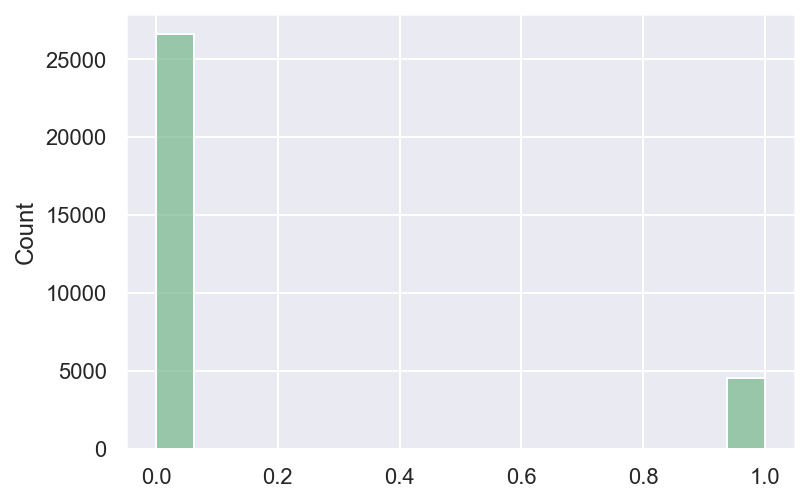

In [288]:
sns.histplot((df['subreddit'] == 1) & (df['body_word_count']));